In [1]:
import os
import pandas as pd
sample_data = []
import GEOparse
gse = GEOparse.get_GEO(geo="GSE288708", destdir="../data/raw")
print(gse)
for gsm_name, gsm in gse.gsms.items():
    title = gsm.metadata.get("title", [""])[0].strip()

    # Skip entries with missing titles (to avoid blank row)
    if title == "":
        continue
    
    # Treatment
    if title.startswith("IR"):
        treatment = "Insulin Resistant"
    else:
        treatment = "Control"

    # Oxygen
    if "Hypoxia" in title:
        oxygen = "Hypoxia"
    else:
        oxygen = "Normoxia"

    # Replicate
    replicate = ''.join([c for c in title if c.isdigit()])

    # Group code
    if treatment == "Control" and oxygen == "Normoxia":
        group = "CN"
    elif treatment == "Control" and oxygen == "Hypoxia":
        group = "CH"
    elif treatment == "Insulin Resistant" and oxygen == "Normoxia":
        group = "IRN"
    else:
        group = "IRH"

    sample_data.append({
        "Sample": gsm_name,
        "Title": title,
        "Treatment": treatment,
        "Oxygen": oxygen,
        "Replicate": replicate,
        "Group": group
    })


17-Sep-2025 15:05:56 DEBUG utils - Directory ../data/raw already exists. Skipping.
17-Sep-2025 15:05:56 INFO GEOparse - File already exist: using local version.
17-Sep-2025 15:05:56 INFO GEOparse - Parsing ../data/raw\GSE288708_family.soft.gz: 
17-Sep-2025 15:05:56 DEBUG GEOparse - DATABASE: GeoMiame
17-Sep-2025 15:05:56 DEBUG GEOparse - SERIES: GSE288708
17-Sep-2025 15:05:56 DEBUG GEOparse - PLATFORM: GPL24676
17-Sep-2025 15:05:56 DEBUG GEOparse - SAMPLE: GSM8773456
17-Sep-2025 15:05:56 DEBUG GEOparse - SAMPLE: GSM8773457
17-Sep-2025 15:05:56 DEBUG GEOparse - SAMPLE: GSM8773458
17-Sep-2025 15:05:56 DEBUG GEOparse - SAMPLE: GSM8773459
17-Sep-2025 15:05:56 DEBUG GEOparse - SAMPLE: GSM8773460
17-Sep-2025 15:05:56 DEBUG GEOparse - SAMPLE: GSM8773461
17-Sep-2025 15:05:56 DEBUG GEOparse - SAMPLE: GSM8773462
17-Sep-2025 15:05:56 DEBUG GEOparse - SAMPLE: GSM8773463
17-Sep-2025 15:05:56 DEBUG GEOparse - SAMPLE: GSM8773464
17-Sep-2025 15:05:56 DEBUG GEOparse - SAMPLE: GSM8773465
17-Sep-2025 15:

<SERIES: GSE288708 - 20 SAMPLES, 1 d(s)>


In [2]:
import os

# Define your project root folder (adjust path if needed)
project_dir = r"C:\Users\Maira\Downloads\T2D_Drug_Target_Discovery"

# Create "data/processed" inside project directory
processed_dir = os.path.join(project_dir, "data", "processed")
os.makedirs(processed_dir, exist_ok=True)

print("Processed directory created at:", processed_dir)


Processed directory created at: C:\Users\Maira\Downloads\T2D_Drug_Target_Discovery\data\processed


In [3]:
meta_df = pd.DataFrame(sample_data)
meta_df = meta_df[meta_df["Sample"].notnull()]
csv_path = os.path.join(processed_dir, "sample_metadata.csv")
meta_df.to_csv(csv_path, index=False)

print(f"✅ Metadata saved to: {csv_path}")
print(meta_df.head())
meta_df.shape

✅ Metadata saved to: C:\Users\Maira\Downloads\T2D_Drug_Target_Discovery\data\processed\sample_metadata.csv
       Sample                  Title Treatment   Oxygen Replicate Group
0  GSM8773456  CH1 - Control Hypoxia   Control  Hypoxia         1    CH
1  GSM8773457  CH2 - Control Hypoxia   Control  Hypoxia         2    CH
2  GSM8773458  CH3 - Control Hypoxia   Control  Hypoxia         3    CH
3  GSM8773459  CH4 - Control Hypoxia   Control  Hypoxia         4    CH
4  GSM8773460  CH5 - Control Hypoxia   Control  Hypoxia         5    CH


(20, 6)

## Visualize Sample Groups

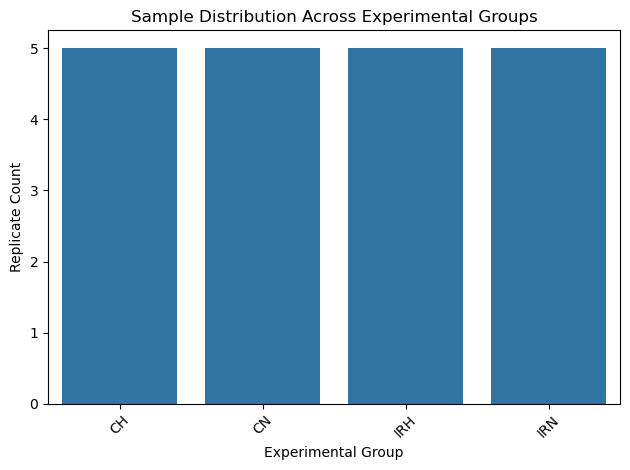

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=meta_df, x="Group")
plt.title("Sample Distribution Across Experimental Groups")
plt.xlabel("Experimental Group")
plt.ylabel("Replicate Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Or a beautiful plot

C:\Users\maira\AppData\Local\Temp\ipykernel_23400\1840336071.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=meta_df, x="Group", palette="viridis", edgecolor=".2")


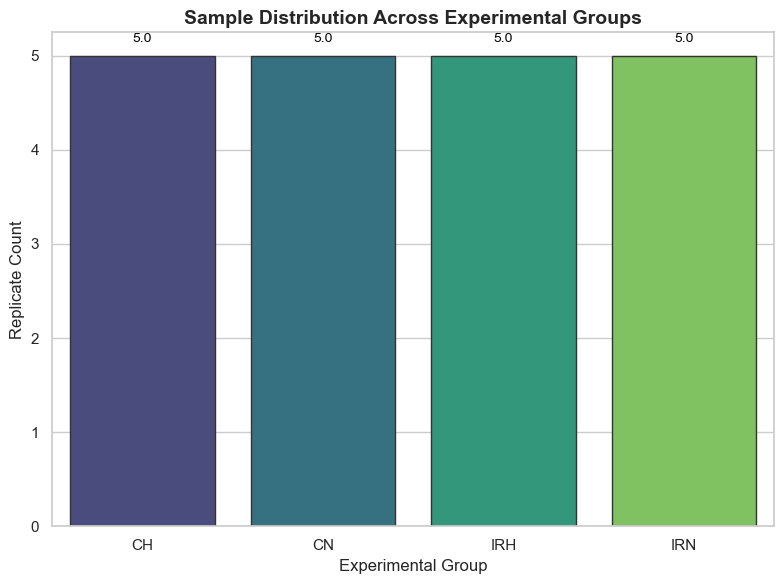

✅ Plot saved to: C:\Users\maira\Downloads\T2D_Drug_Target_Discovery\results\plots\sample_distribution.png


In [5]:
# Visualize Sample Groups
# Exploratory Data Analysis (EDA) before diving into differential gene expression.

import seaborn as sns
import matplotlib.pyplot as plt
import os

# Base project path
project_dir = r"C:\Users\maira\Downloads\T2D_Drug_Target_Discovery"

# 💾 Ensure the folder exists
plots_dir = os.path.join(project_dir, "results", "plots")
os.makedirs(plots_dir, exist_ok=True)

# Set a better style
sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))  # Set figure size

# Count plot by group
ax = sns.countplot(data=meta_df, x="Group", palette="viridis", edgecolor=".2")

# Add counts on top of bars (✨ aesthetic + informative)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height + 0.1),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

# Titles and labels
plt.title("Sample Distribution Across Experimental Groups", fontsize=14, fontweight='bold')
plt.xlabel("Experimental Group", fontsize=12)
plt.ylabel("Replicate Count", fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()

# 💾 Save the plot before showing
save_path = os.path.join(plots_dir, "sample_distribution.png")
plt.savefig(save_path, dpi=300, bbox_inches='tight')  # High-res save

# also export as PDF or SVG for vector quality
#plt.savefig(os.path.join(plots_dir, "sample_distribution.pdf"))
#plt.savefig(os.path.join(plots_dir, "sample_distribution.svg"))

# Show the plot
plt.show()

print(f"✅ Plot saved to: {save_path}")
